In [70]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller

from plotly.subplots import make_subplots
import hurst
from matplotlib.patches import Patch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go


In [71]:
data = pd.read_csv('NVDA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data["log_price"] = np.log(data["Close"])
data["diff_log_price"] = data["log_price"].diff()
data["diff_log_price"] = data["diff_log_price"].fillna(0)
data["cum_diff_log_price"] = data["diff_log_price"].cumsum()

In [72]:
# do the min-max scaling
data['Close_min_max'] = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())

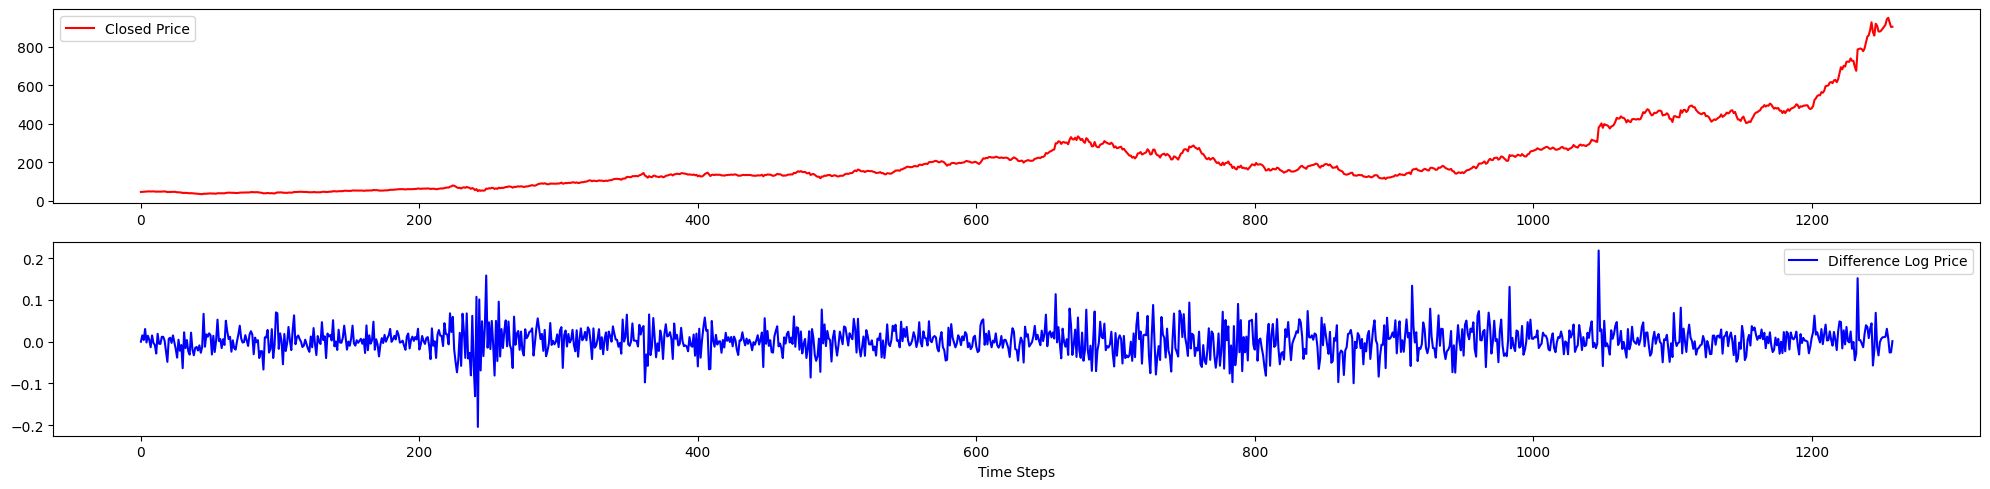

In [73]:
fig1, ax1 = plt.subplots(2, 1)
fig1.set_size_inches(20, 5)
ax1[0].plot(data["Close"], color='red')
ax1[1].plot(data["diff_log_price"], color='blue')
ax1[1].set_xlabel('Time Steps')

# set legend
ax1[0].legend(['Closed Price'])
ax1[1].legend(['Difference Log Price'])
fig1.tight_layout()

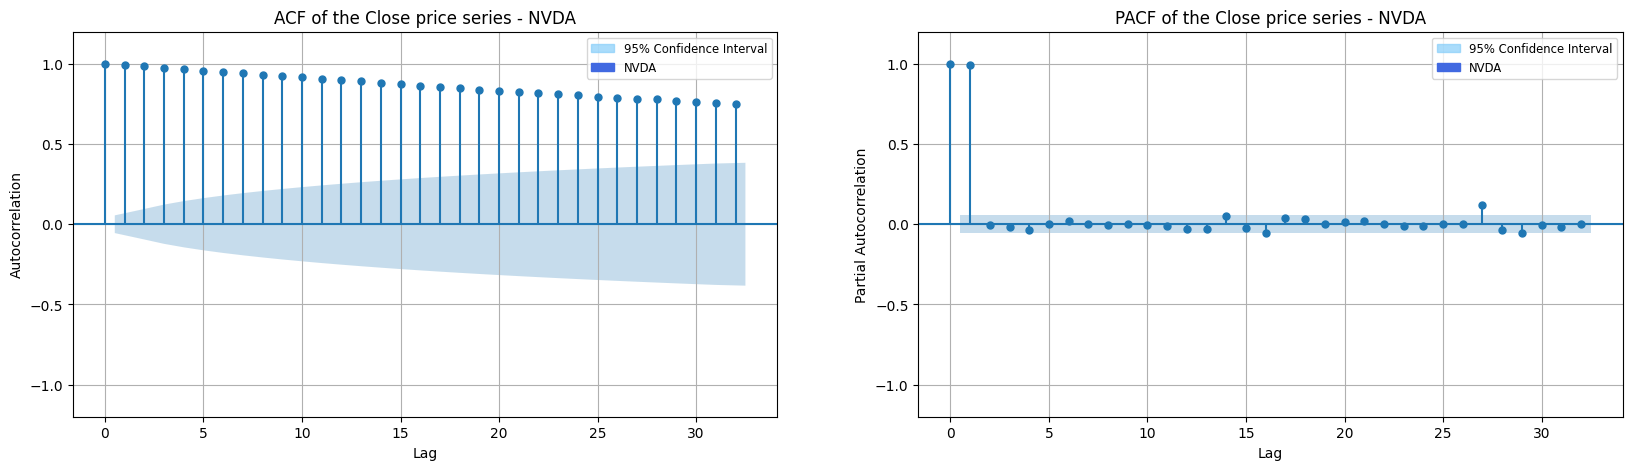

In [74]:
def plot_acf_pacf_in_parallel(values: np.array, etf_name: str, price_type: str = 'Close'):
    legend_patch_confidence = Patch(color='lightskyblue', alpha=0.7, label='95% Confidence Interval')
    legend_patch_series = Patch(color='royalblue', label=etf_name)
    legend = [legend_patch_confidence, legend_patch_series]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    plot_acf(x=values, ax=ax1)
    ax1.set_title(f'ACF of the {price_type} price series - {etf_name}')
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.grid(True)
    ax1.set_ylim(-1.2, 1.2)
    ax1.legend(handles=legend, loc='upper right', fontsize='small')
    plot_pacf(x=values, ax=ax2)
    ax2.set_title(f'PACF of the {price_type} price series - {etf_name}')
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    ax2.grid(True)
    ax2.set_ylim(-1.2, 1.2)
    ax2.legend(handles=legend, loc='upper right', fontsize='small')
    plt.show()

plot_acf_pacf_in_parallel(data['Close'], 'NVDA', 'Close')

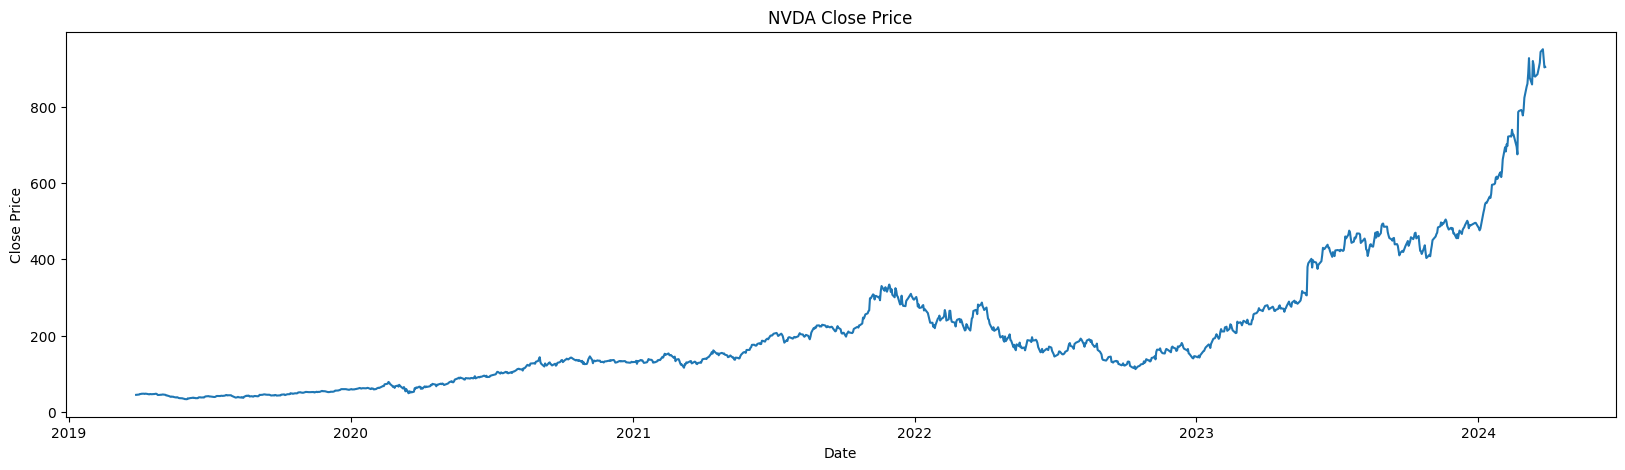

In [75]:
# close price
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close'])
plt.title('NVDA Close Price')
plt.ylabel(ylabel='Close Price')
plt.xlabel(xlabel='Date')
plt.axis('tight')
plt.show()

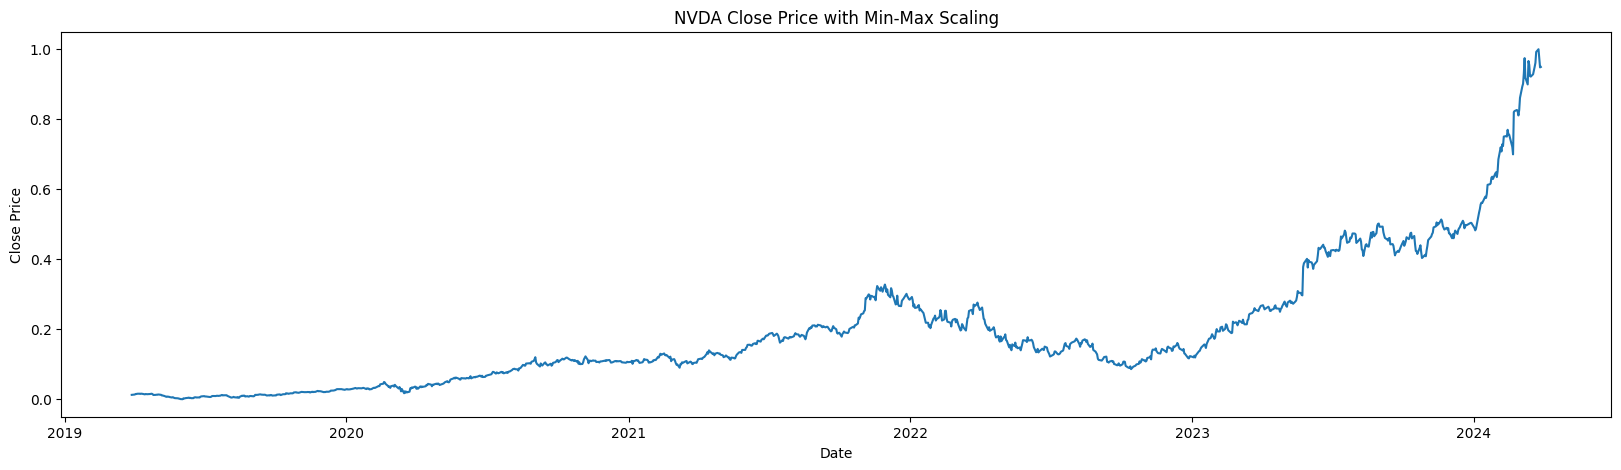

In [76]:
# close price
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close_min_max'])
plt.title('NVDA Close Price with Min-Max Scaling')
plt.ylabel(ylabel='Close Price')
plt.xlabel(xlabel='Date')
plt.axis('tight')
plt.show()

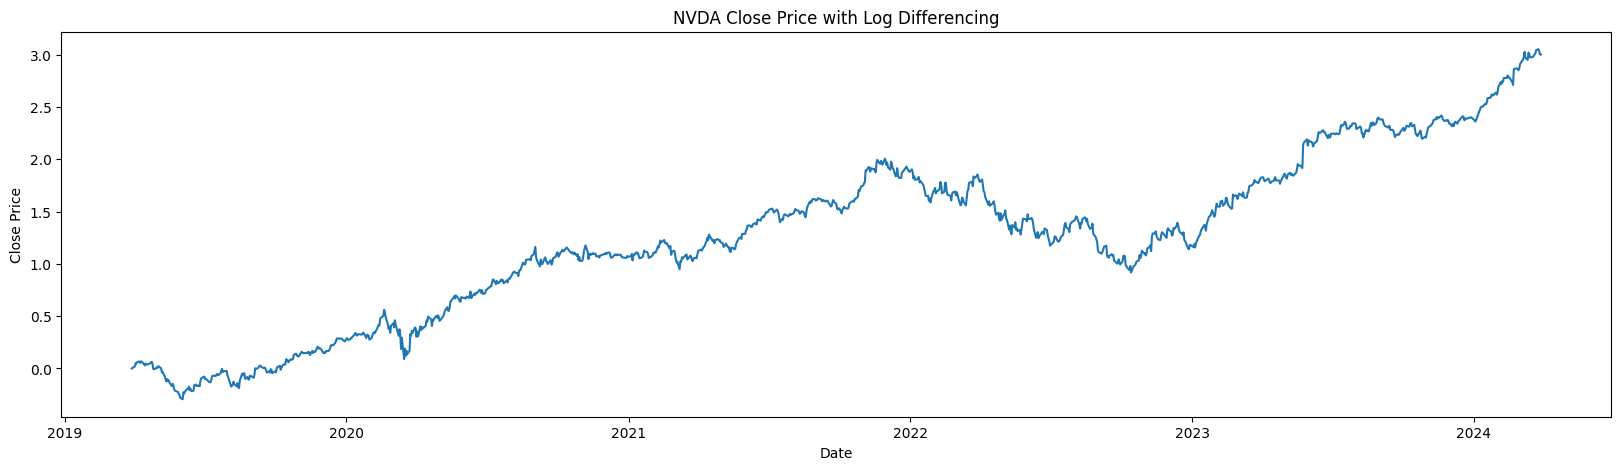

In [77]:
# close price
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['cum_diff_log_price'])
plt.title('NVDA Close Price with Log Differencing')
plt.ylabel(ylabel='Close Price')
plt.xlabel(xlabel='Date')
plt.axis('tight')
plt.show()

In [92]:
# candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.update_layout(
    yaxis_title="Price ($)",
    xaxis_title="Date",
    xaxis_rangeslider_visible=False
    )
# legend
fig.show()

In [79]:
# hurst exponent
H, c, _ = hurst.compute_Hc(data['Close'])
H = round(H, 2)
print(f'Hurst Exponent: {H}')
if H < 0.5:
    print('The time series is mean reverting')
elif H == 0.5:
    print('The time series is a Geometric Brownian Motion')
else:
    print('The time series is trending')

Hurst Exponent: 0.63
The time series is trending


In [80]:
# adf test
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] > 0.05:
    print('The time series is not stationary')
else:
    print('The time series is stationary')

ADF Statistic: 2.501725407198294
p-value: 0.9990504047894916
Critical Values:
	1%: -3.4356474307506084
	5%: -2.8638793281844253
	10%: -2.5680154897465575
The time series is not stationary


In [81]:
# adf test
result = adfuller(data['diff_log_price'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] > 0.05:
    print('The time series is not stationary')
else:
    print('The time series is stationary')

ADF Statistic: -10.779028495877986
p-value: 2.280256426069019e-19
Critical Values:
	1%: -3.435592223709696
	5%: -2.8638549702604803
	10%: -2.56800251776
The time series is stationary


In [83]:
# skewness and kurtosis
skewness = data['Close'].skew()
kurtosis = data['Close'].kurtosis()
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

if skewness > 0:
    print('The time series is positively skewed')
elif skewness < 0:
    print('The time series is negatively skewed')

if kurtosis > 0:
    print('The time series is leptokurtic')
elif kurtosis < 0:
    print('The time series is platykurtic')

Skewness: 1.7699675651062916
Kurtosis: 3.6251258326214515
The time series is positively skewed
The time series is leptokurtic


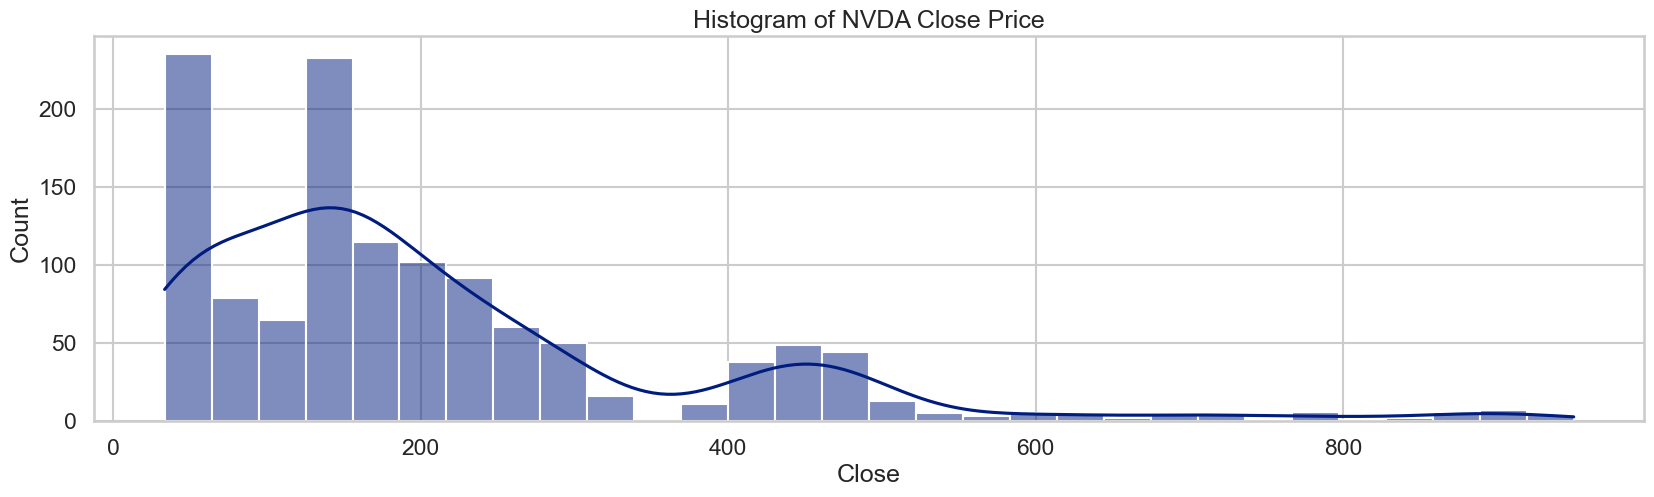

In [84]:
plt.figure(figsize=(20, 5))
sns.set(style='whitegrid')
sns.set_context('talk')
sns.set_palette('dark')
sns.histplot(data['Close'], kde=True)
plt.title('Histogram of NVDA Close Price')
plt.show()

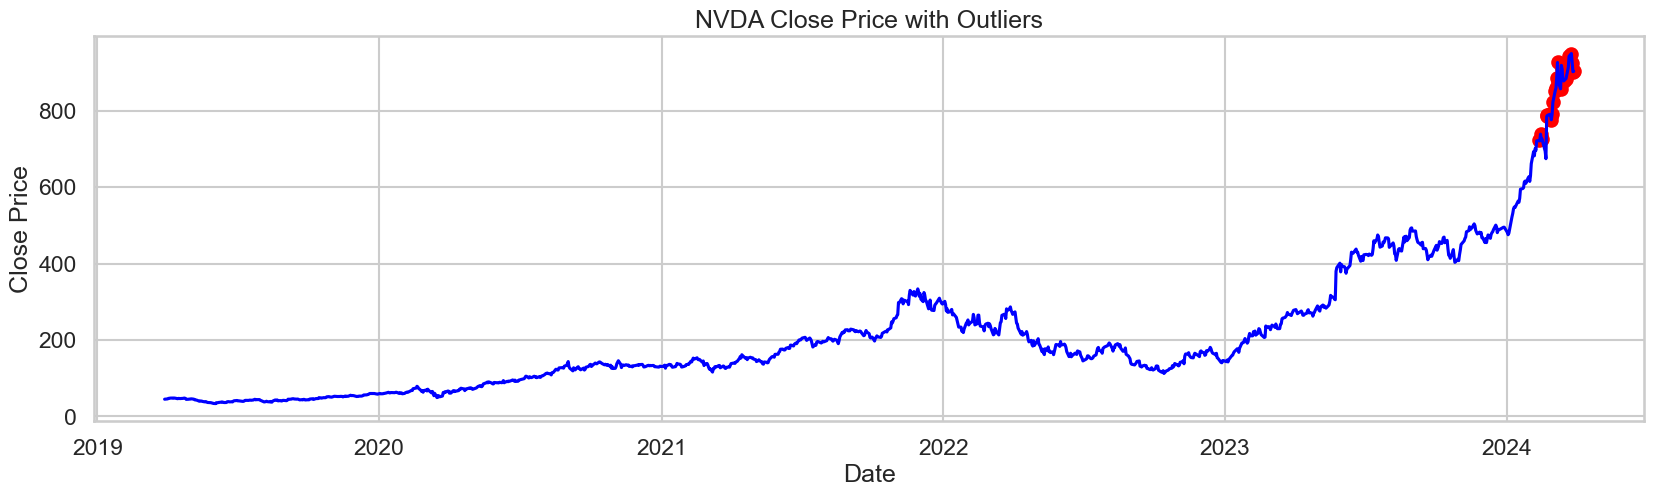

In [86]:
# z-score to detect outliers
data['z_score'] = (data['Close'] - data['Close'].mean()) / data['Close'].std()
data['outlier'] = data['z_score'].apply(lambda x: 1 if x > 3 or x < -3 else 0)
outliers = data[data['outlier'] == 1]
# plot the outliers
plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close'], color='blue')
plt.scatter(outliers['Date'], outliers['Close'], color='red')
plt.title('NVDA Close Price with Outliers')
plt.ylabel(ylabel='Close Price')
plt.xlabel(xlabel='Date')
plt.axis('tight')
plt.show()

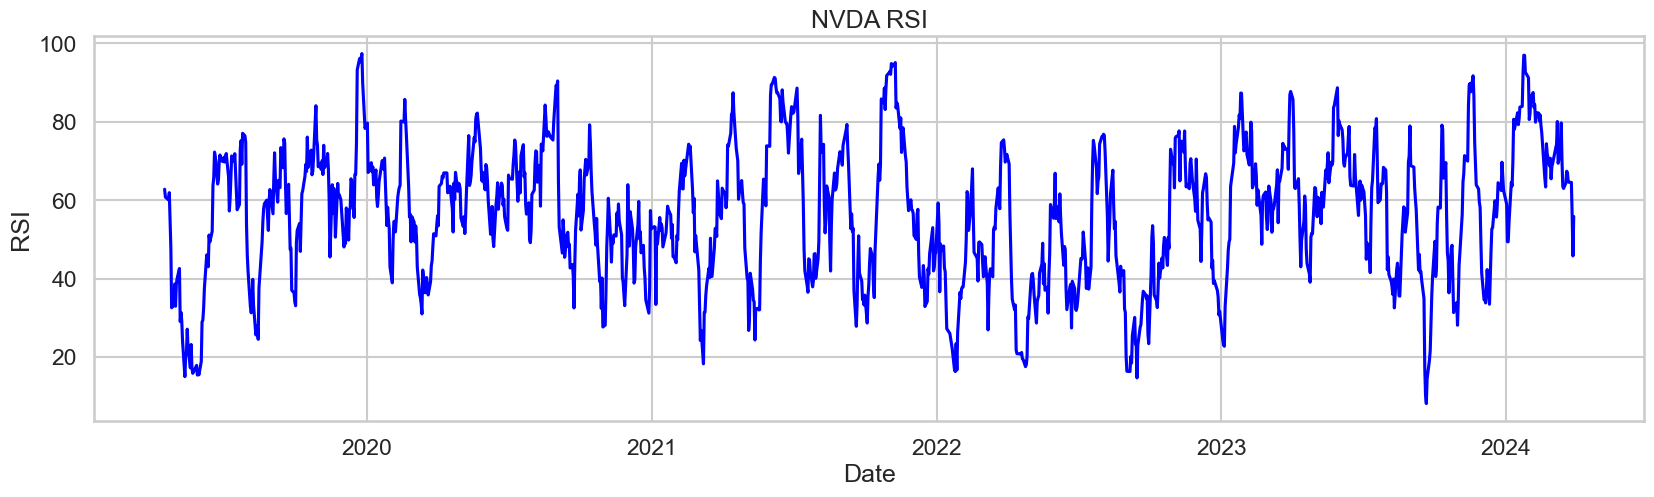

In [87]:
# Relative Strength Index
def rsi(data: pd.DataFrame, window: int = 14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI'] = rsi(data)

plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['RSI'], color='blue')
plt.title('NVDA RSI')
plt.ylabel(ylabel='RSI')
plt.xlabel(xlabel='Date')
plt.axis('tight')
plt.show()

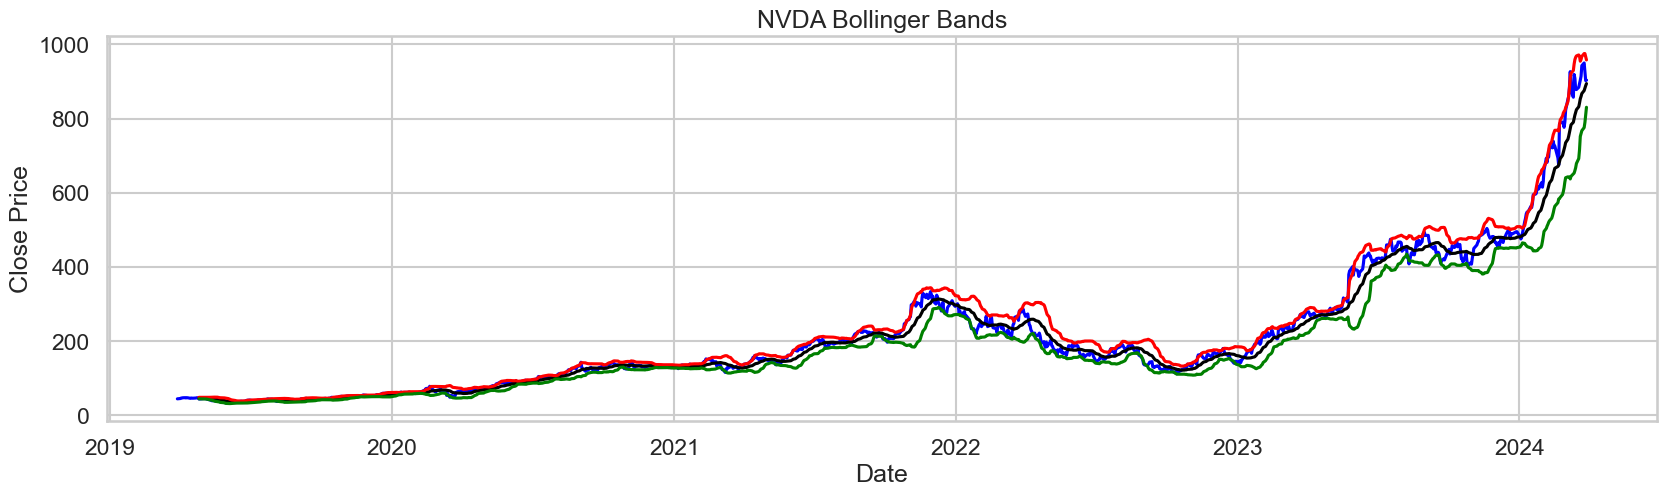

In [89]:
# Bollinger Bands
def bollinger_bands(data: pd.DataFrame, window: int = 20, num_std: int = 2):
    data['MA'] = data['Close'].rolling(window=window).mean()
    data['BB_up'] = data['MA'] + num_std * data['Close'].rolling(window=window).std()
    data['BB_down'] = data['MA'] - num_std * data['Close'].rolling(window=window).std()
    return data

data = bollinger_bands(data)

plt.figure(figsize=(20, 5))
plt.plot(data['Date'], data['Close'], color='blue')
plt.plot(data['Date'], data['MA'], color='black')
plt.plot(data['Date'], data['BB_up'], color='red')
plt.plot(data['Date'], data['BB_down'], color='green')
plt.title('NVDA Bollinger Bands')
plt.ylabel(ylabel='Close Price')
plt.xlabel(xlabel='Date')

plt.axis('tight')
plt.show()